## Unsupervised Learning Model Evaluation Lab
Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()
scaler.fit(X)
X_sca=pd.DataFrame(
    scaler.transform(X), columns=X.columns)

In [20]:
from sklearn.cluster import KMeans

kmeans_fit = KMeans(n_clusters=8)
kmeans_fit.fit(X_sca)


KMeans()

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score


In [22]:
X_sca.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,km8_clu,sil_k8
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1.113702,0.744862
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.113702,0.463301
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0.641704,-2.341493
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1.113702,1.184592
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0.641704,0.946325


In [23]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,km8_clu,sil_k8
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,6,0.221444
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,6,0.193202
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,5,-0.088130
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,6,0.265550
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,5,0.241651


In [24]:
X["km8_clu"] = kmeans_fit.labels_
X_sca["km8_clu"] = kmeans_fit.labels_


In [25]:
X_sca['sil_k8'] = silhouette_samples(X_sca.drop('km8_clu', axis=1), X_sca["km8_clu"])
X['sil_k8'] = silhouette_samples(X_sca.drop('km8_clu', axis=1), X_sca["km8_clu"])

In [26]:
X_sca.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,km8_clu,sil_k8
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1,0.289584
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1,0.204875
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,6,0.199400
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1,0.336325
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,6,0.095429


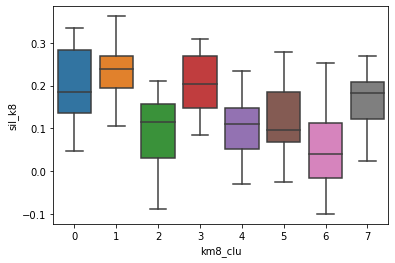

In [27]:
sns.boxplot(data = X, x = 'km8_clu', y = 'sil_k8');

In [29]:
silhouette_avg= silhouette_score(X_sca,kmeans_fit.labels_)
silhouette_avg

0.29878757403537787

2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [31]:
scaler=StandardScaler()
scaler.fit(X)
X_sca_kn5=pd.DataFrame(
    scaler.transform(X), columns=X.columns)
kmeans_fit_5 = KMeans(n_clusters=5)
kmeans_fit_5.fit(X_sca_kn5)


KMeans(n_clusters=5)

In [37]:
X["km5_clu"] = kmeans_fit_5.labels_
X_sca_kn5["km5_clu"] = kmeans_fit_5.labels_

In [38]:

X_sca_kn5['sil_k5'] = silhouette_samples(X_sca_kn5.drop("km5_clu", axis=1), X_sca_kn5["km5_clu"])
X['sil_k5'] = silhouette_samples(X_sca_kn5.drop("km5_clu", axis=1), X_sca_kn5["km5_clu"])


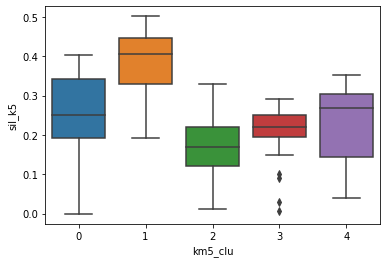

In [40]:
sns.boxplot(data = X, x = 'km5_clu', y = 'sil_k5');

In [41]:
silhouette_avg5= silhouette_score(X_sca_kn5,kmeans_fit_5.labels_)
silhouette_avg5

0.31320608798100746

3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [42]:
scaler=StandardScaler()
scaler.fit(X)
X_sca_kn3=pd.DataFrame(
    scaler.transform(X), columns=X.columns)
kmeans_fit_3 = KMeans(n_clusters=3)
kmeans_fit_3.fit(X_sca_kn3)

KMeans(n_clusters=3)

In [43]:
X["km3_clu"] = kmeans_fit_3.labels_
X_sca_kn3["km3_clu"] = kmeans_fit_3.labels_

In [44]:

X_sca_kn3['sil_k3'] = silhouette_samples(X_sca_kn3.drop("km3_clu", axis=1), X_sca_kn3["km3_clu"])
X['sil_k3'] = silhouette_samples(X_sca_kn3.drop("km3_clu", axis=1), X_sca_kn3["km3_clu"])


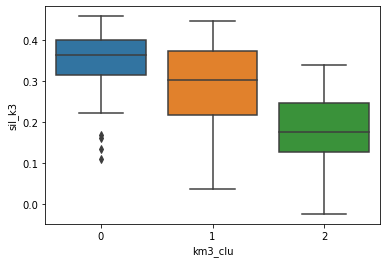

In [46]:
sns.boxplot(data = X, x = 'km3_clu', y = 'sil_k3');

In [47]:
silhouette_avg3= silhouette_score(X_sca_kn3,kmeans_fit_3.labels_)
silhouette_avg3

0.2787324705893196

4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.
The Yellowbrick library has 3 metrics that you can plot using the metric parameter:

distortion: mean sum of squared distances to centers
silhouette: mean ratio of intra-cluster and nearest-cluster distance
calinski_harabaz: ratio of within to between cluster dispersion

In [59]:
cols = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']

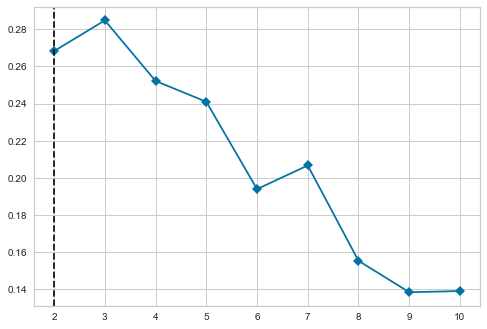

In [63]:
#distortion, silhoutte, calinsky

km_fit = KMeans()
km_opt = KElbowVisualizer(km_fit, n_clusters=(3, 11), timings = False,  metric='silhouette')

fit = km_opt.fit(X_sca[cols])

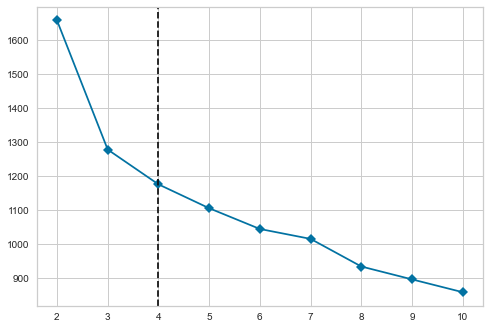

In [64]:
km_fit = KMeans()
km_opt = KElbowVisualizer(km_fit, n_clusters=(3, 11), timings = False,  metric='distortion')

fit = km_opt.fit(X_sca[cols])

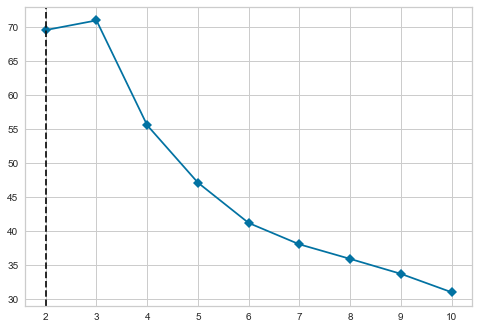

In [65]:
km_fit = KMeans()
km_opt = KElbowVisualizer(km_fit, n_clusters=(3, 11), timings = False,  metric='calinski_harabasz')

fit = km_opt.fit(X_sca[cols])

5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [66]:
from sklearn.cluster import AgglomerativeClustering

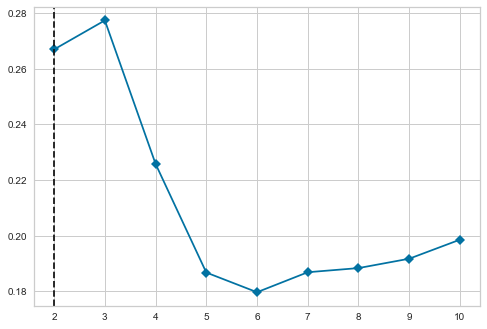

In [70]:
ac_fit= AgglomerativeClustering(affinity='euclidean', linkage='ward')
km_opt= KElbowVisualizer(ac_fit, n_clusters=(2,11), timings= False, metric = 'silhouette'
                        )
fit = km_opt.fit(X_sca[cols])

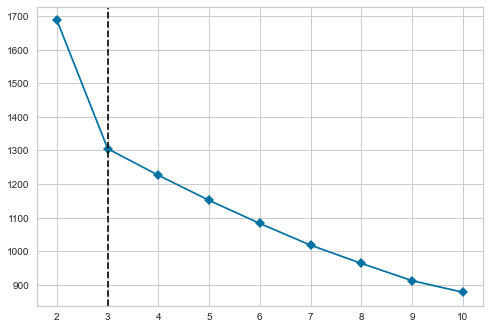

In [72]:
ac_fit= AgglomerativeClustering(affinity='euclidean', linkage='ward')
km_opt= KElbowVisualizer(ac_fit, n_clusters=(2,11), timings= False, metric = 'distortion'
                        )
fit = km_opt.fit(X_sca[cols])

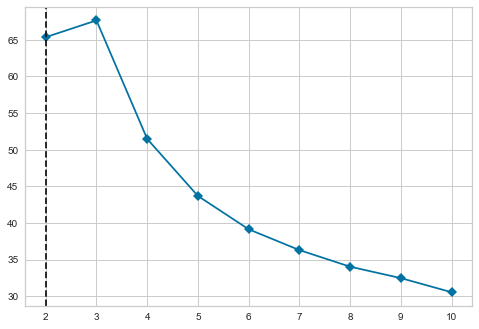

In [71]:
ac_fit= AgglomerativeClustering(affinity='euclidean', linkage='ward')
km_opt= KElbowVisualizer(ac_fit, n_clusters=(2,11), timings= False, metric = 'calinski_harabasz'
                        )
fit = km_opt.fit(X_sca[cols])

6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.
Use the model and number of clusters that returned the best result above.

In [75]:
X_sca.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,km8_clu,sil_k8
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1,0.289584
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1,0.204875
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,6,0.199400
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1,0.336325
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,6,0.095429


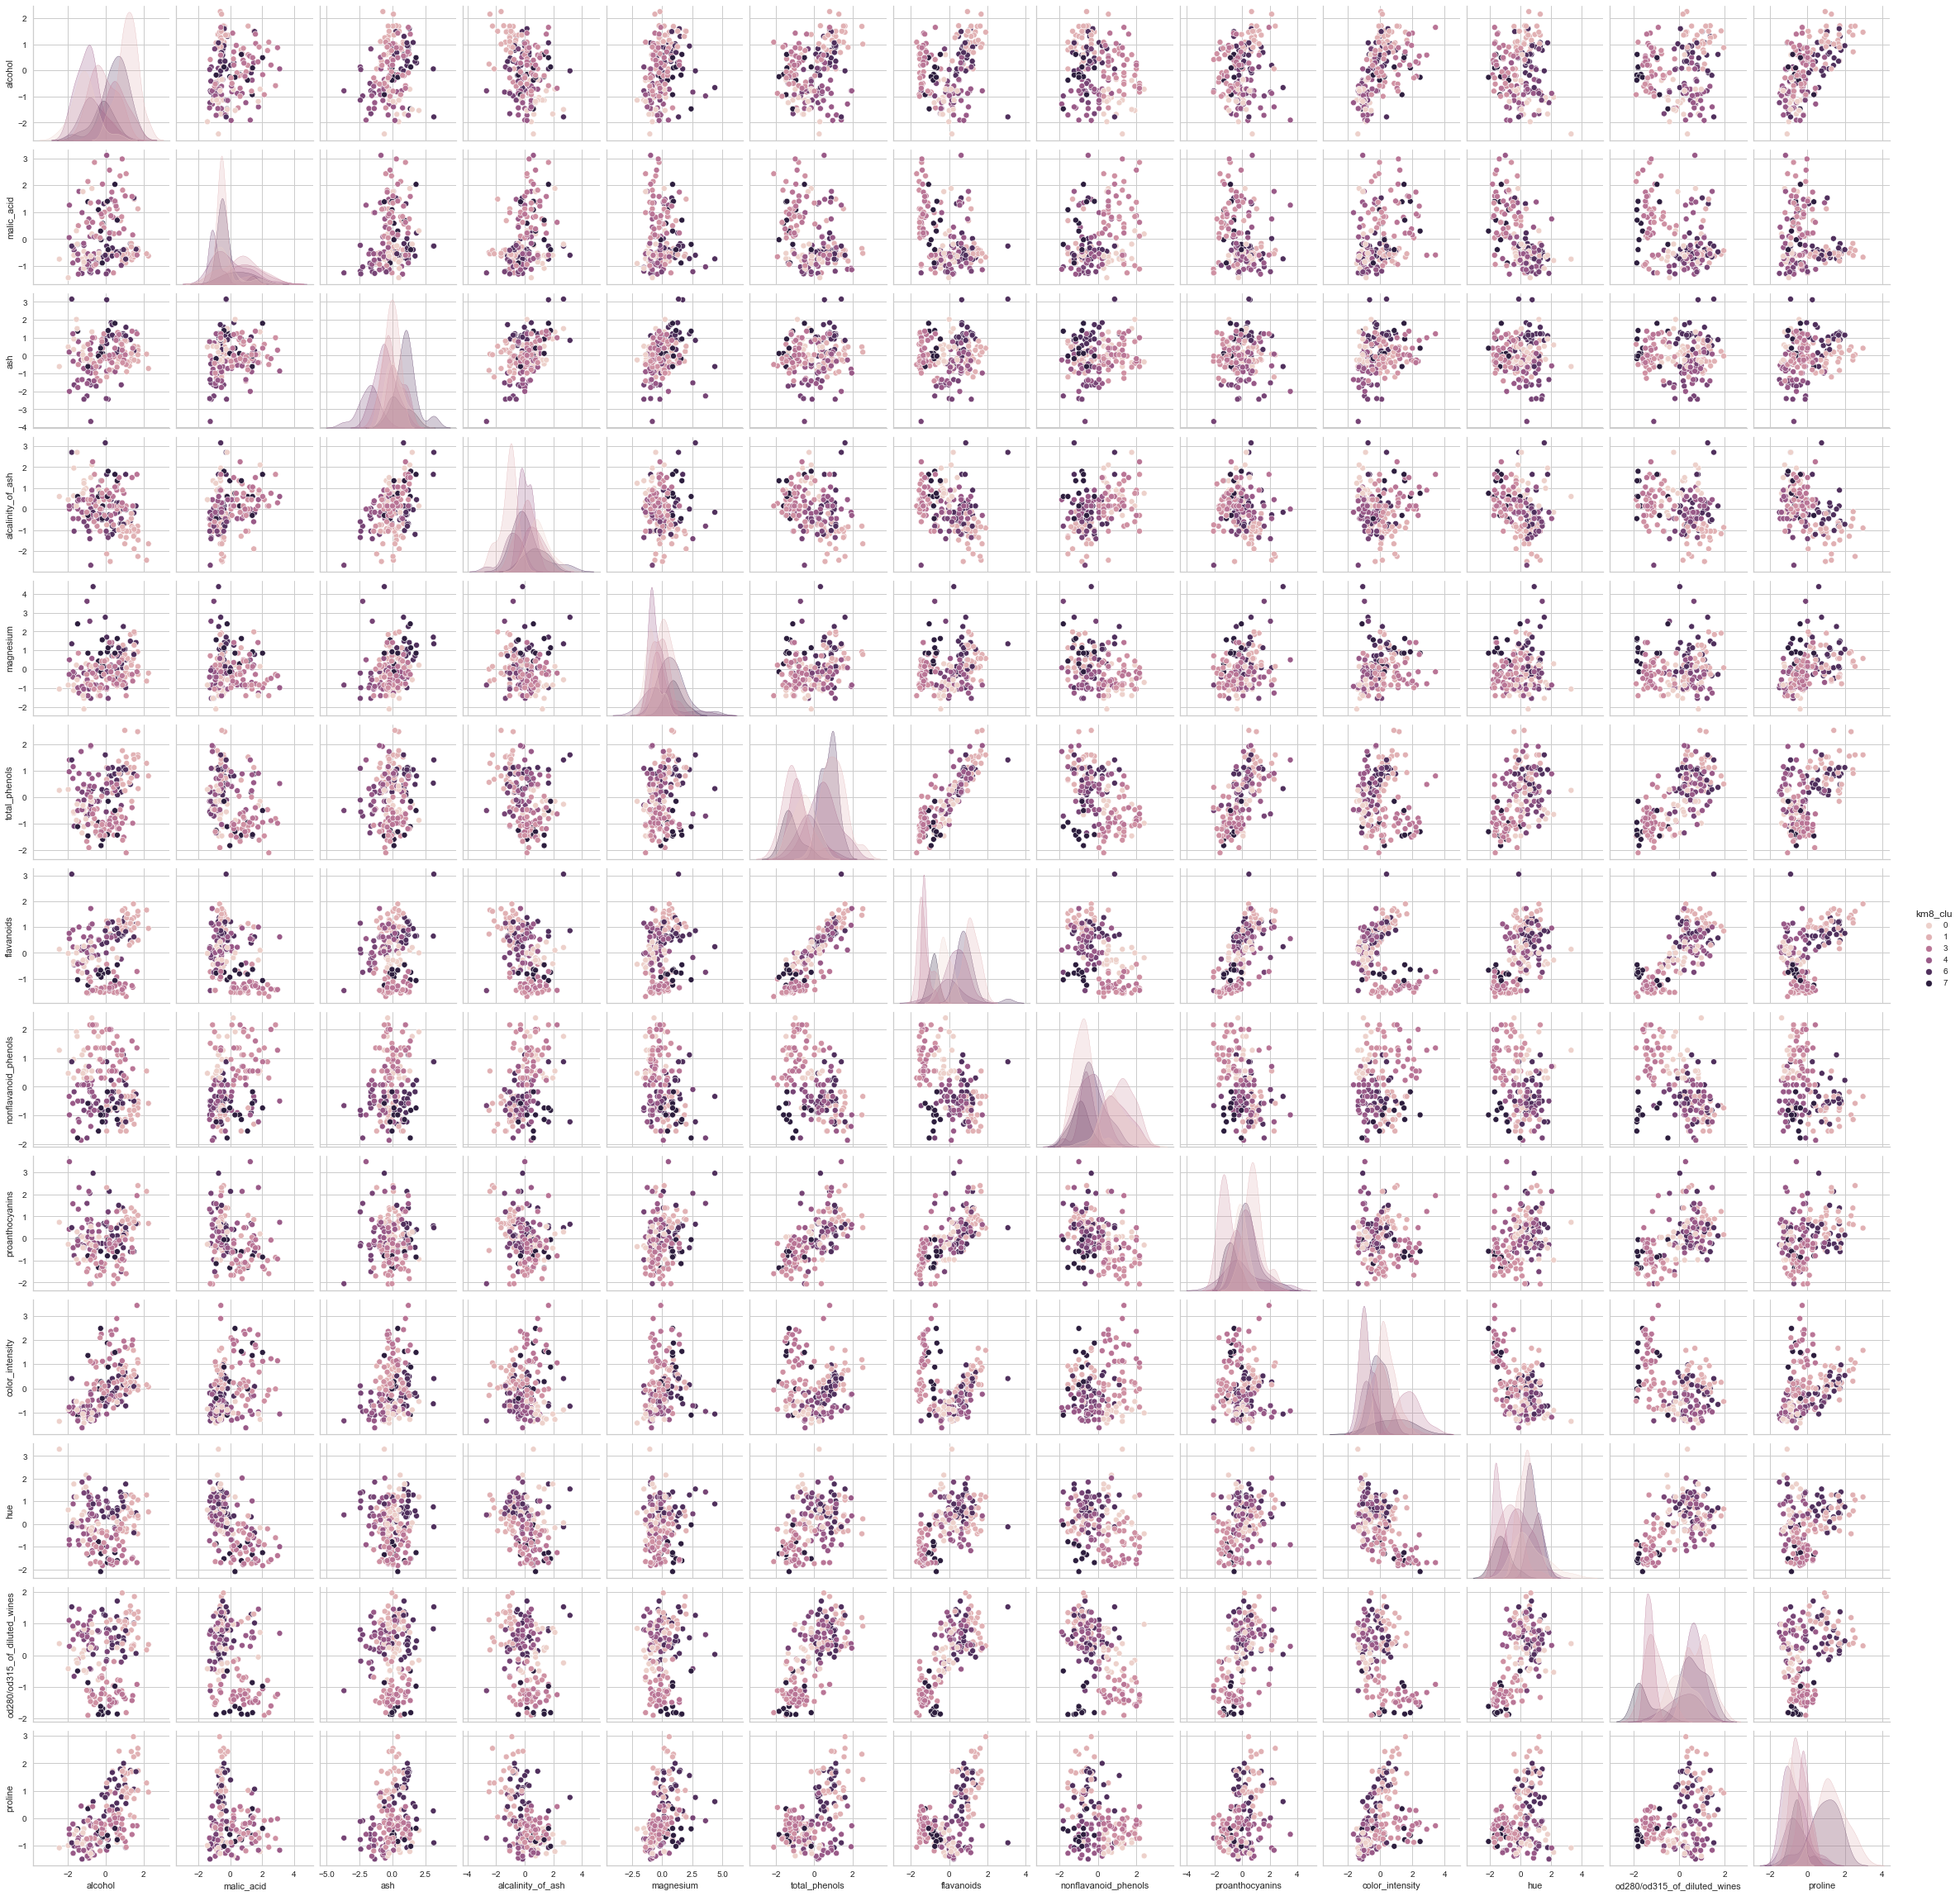

In [77]:
sns.pairplot(data = X_sca.drop(columns=['sil_k8']), hue= 'km8_clu')


7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.
 

In [79]:
from sklearn.decomposition import PCA

In [85]:
PCA_fit= PCA(n_components=2)
PCA_fit.fit(X_sca)
X_pca=pd.DataFrame(PCA_fit.transform(X_sca),columns=['pc1','pc2'])

<function matplotlib.pyplot.show(close=None, block=None)>

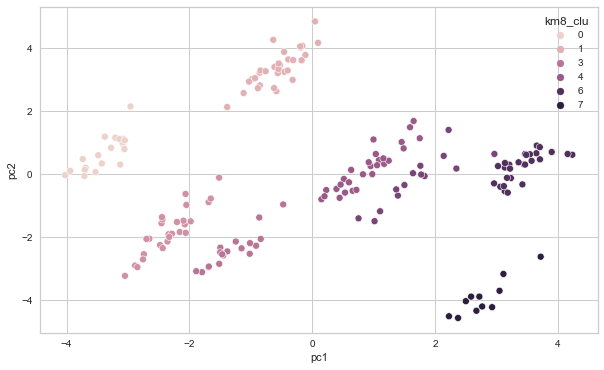

In [86]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=X_pca,x=X_pca['pc1'],y=X_pca['pc2'], hue=X_sca['km8_clu'])
plt.show